In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100 ,2))
X[:,0]=np.random.uniform(0., 100, size=100)
X[:,1] = 0.75 * X[:,0] + 3 + np.random.normal(0, 10, size=100)

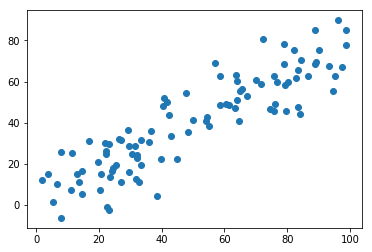

In [3]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
def demean(X):
    return X - np.mean(X, axis=0)

In [5]:
X_demean = demean(X)

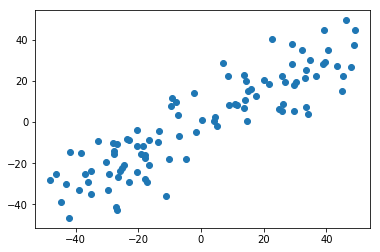

In [6]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [7]:
"""gradient ascent"""

def f(w, X):
    return np.sum((X.dot(w))**2) / len(X)

def df_debug(w, X, eplison=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = np.copy(w)
        w_1[i] += eplison
        w_2 = np.copy(w)
        w_2[i] -= eplison
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * eplison)
    return res

def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2 / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, eplison=1e-8):
    w = direction(initial_w)
    
    cur_iters = 0
    while cur_iters < n_iters:
        gradient = df(w, X)
        last_w = w
        w += eta * gradient
        w = direction(w)  # only one unit direction vetcor at a time
        if abs(f(last_w, X) - f(w, X))  < eplison:
            break
        cur_iters += 1
    return w        

In [8]:
initial_w = np.random.random(len(X[1]))  # cannot start with zero vector
initial_w

array([0.61789166, 0.20196332])

In [9]:
eta = 0.001
# cannot use StandardScaler standardized data

In [10]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
w

array([0.77842177, 0.62774163])

In [11]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77842177, 0.62774163])

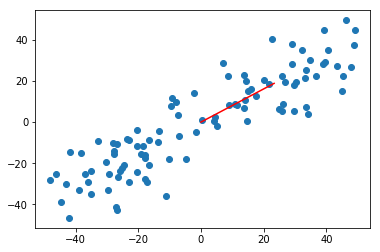

In [12]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

### 使用极端数据集

In [13]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0., 100., size = 100)
X2[:,1] = X2[:,0] * 0.75 + 3.
X2 = demean(X2)

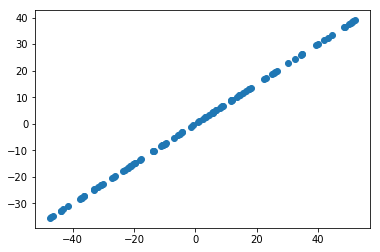

In [14]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [15]:
w = gradient_ascent(df_math, X2, initial_w, eta)

In [16]:
w

array([0.8, 0.6])

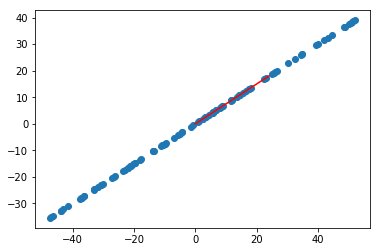

In [17]:
plt.scatter(X2[:,0], X2[:,1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

In [18]:
from playML.PCA import PCA

In [19]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [20]:
pca.components_

array([[ 0.77842177,  0.62774163],
       [-0.62774163,  0.77842177]])

In [21]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [22]:
pca.components_

array([[0.77842177, 0.62774163]])

In [23]:
X_pca = pca.transform(X)

In [24]:
X_inverse = pca.inverse_transform(X_pca)

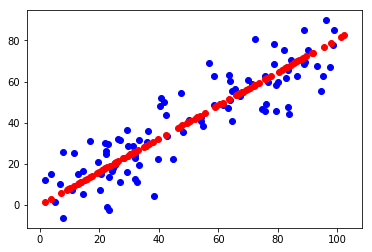

In [25]:
plt.scatter(X[:, 0], X[:, 1], color="b")
plt.scatter(X_inverse[:,0], X_inverse[:, 1], color="r")
plt.show()